In [1]:
#in this lecture we convert image to string using tensorflow lib 
#you can apply this lecture using segmentation label (segmentation label is composed by Image )


In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io 
import Image
%matplotlib inline

In [3]:
filename_pairs  = ['./sample_imgae/lesser_panda1.jpg' , 
                   './sample_imgae/lesser_panda2.jpg',
                  './sample_imgae/raccoon.jpg']

In [4]:
img=Image.open(filename_pairs[0])
print np.shape(img)

(248, 203, 3)


In [5]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list = tf.train.BytesList(value = [value]))
def _int64_feature(value):
    return tf.train.Feature(int64_list = tf.train.Int64List(value = [value]))
tfrecords_filename = 'sample_image.tfrecords'

In [6]:
writer =tf.python_io.TFRecordWriter(tfrecords_filename)

In [7]:
original_img = []

In [8]:
for img_path in filename_pairs:
    np_img= np.asarray(Image.open(img_path))
    height=np_img.shape[0]
    width=np_img.shape[1]
    raw_img=np_img.tostring()
    example = tf.train.Example(features = tf.train.Features(feature ={
        'height': _int64_feature(height) , 
        'width': _int64_feature(width)  ,
        'image_raw': _bytes_feature(raw_img)}))
    writer.write(example.SerializeToString())
writer.close()

In [9]:
filename_pairs

['./sample_imgae/lesser_panda1.jpg',
 './sample_imgae/lesser_panda2.jpg',
 './sample_imgae/raccoon.jpg']

In [10]:
reconstructed_image = []
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)

248 203
424 755
428 640


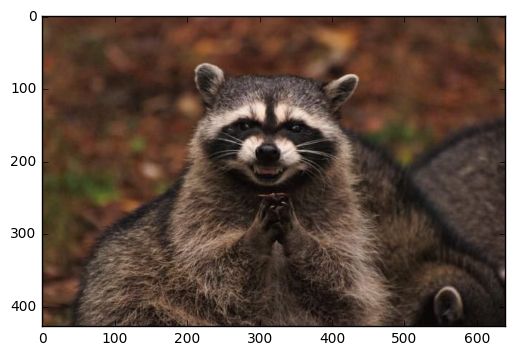

In [11]:
for string_record in record_iterator:
    example =tf.train.Example()
    example.ParseFromString(string_record)
    
    height= int(example.features.feature['height'].int64_list.value[0])
    width = int(example.features.feature['width'].int64_list.value[0])
    raw_img = (example.features.feature['image_raw'].bytes_list.value[0])
    print height , width 
    reconstructed_1d_img=np.fromstring(raw_img  ,dtype = np.uint8)
    reconstructed_img=reconstructed_1d_img.reshape((height, width , -1))
    plt.imshow(reconstructed_img)